In [51]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

### Reading in the data about wine preferences

In [2]:
wine_quality_data = pd.read_csv("winequality-red.csv", sep=';')

In [3]:
wine_quality_data.shape

(1599, 12)

In [4]:
wine_quality_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_quality_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Train/Test Split 

In [6]:
X = wine_quality_data.iloc[:,:-1]

In [7]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
y = wine_quality_data.iloc[:,-1:]

In [9]:
y.head(5)

,quality
0,5
1,5
2,5
3,6
4,5


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Development

#### Ordinary Least Squares

In [46]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Perform Cross Validation

In [12]:
cv_values = [i for i in range(2,11)]
accuracy_values_mse = []

In [13]:
for i in cv_values:
    accuracy_mse = -cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv = i).mean()
    accuracy_values_mse.append(accuracy_mse)

Show plot of k number of folds and accuracy values

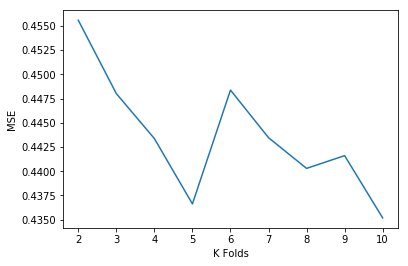

In [15]:
plt.plot(cv_values, accuracy_values_mse)
plt.xlabel("K Folds")
plt.ylabel("MSE")
plt.show()

Print out the coefficients of the linear regression model corresponding to each of the features, along with the intercept term.

In [17]:
for id_value, column_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(column_name, lr_model.coef_[0][id_value]))

lr_intercept = lr_model.intercept_[0]
print("The intercept term for our model is {}".format(lr_intercept))

The coefficient for fixed acidity is 0.023085333909279103
The coefficient for volatile acidity is -1.0013044340678174
The coefficient for citric acid is -0.14082146122412922
The coefficient for residual sugar is 0.0065643110414779346
The coefficient for chlorides is -1.8065031490473662
The coefficient for free sulfur dioxide is 0.005627334387083055
The coefficient for total sulfur dioxide is -0.0036444489338687603
The coefficient for density is -10.351593588833333
The coefficient for pH is -0.3936877323398524
The coefficient for sulphates is 0.8411716226093248
The coefficient for alcohol is 0.2818895674091875
The intercept term for our model is 14.355105195764843


In [18]:
print("The minimum mse value for ols is: " + str(min(accuracy_values_mse)))

The maximum r^2 value for ols is: 0.3115745778424817
The minimum mse value for ols is: 0.43518490403009247
The minimum rmse value for ols is: 0.6596854584043008


#### Ridge Regression 

Perform k-fold cross validation.

In [71]:
mse_values = [0 for i in range(5)]
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001]

In [89]:
kf = RepeatedKFold(n_splits=10, n_repeats=10) 

for train_index, test_index in kf.split(X):
    X_train_indexed = X.iloc[train_index, :]
    X_test_indexed = X.iloc[test_index, :] 
    y_train_indexed = y.iloc[train_index, :]
    y_test_indexed = y.iloc[test_index, :]
    
    for i in range(5):
        alpha = alphas[i]
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_indexed, y_train_indexed)
        y_predict_indexed = ridge_model.predict(X_test_indexed)
        mse = mean_squared_error(y_test_indexed, y_predict_indexed)
        mse_values[i] += mse

Find the optimal alpha (tuning parameter) value.

In [103]:
avg_mse_values = [mse_value/100 for mse_value in mse_values]
min_avg_cross_val_error_value = min(avg_mse_values)
min_avg_mse_index = avg_mse_values.index(min_avg_cross_val_error_value)
alpha = alphas[min_avg_mse_index]

Build a ridge regression model using the optimal alpha value.

In [104]:
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_predict_indexed = ridge_model.predict(X_test)
mse = mean_squared_error(y_test_indexed, y_predict)

Print out the coefficients of the ridge regression model corresponding to each of the features, along with the intercept term.

In [105]:
for id_value, column_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(column_name, ridge_model.coef_[0][id_value]))

ridge_intercept = ridge_model.intercept_[0]
print("The intercept term for our model is {}".format(ridge_intercept))

The coefficient for fixed acidity is 0.012529162675874617
The coefficient for volatile acidity is -1.1716963769769784
The coefficient for citric acid is -0.22387411242767177
The coefficient for residual sugar is 0.0001890715062480952
The coefficient for chlorides is -1.6595393567012495
The coefficient for free sulfur dioxide is 0.004980862686280313
The coefficient for total sulfur dioxide is -0.0030792104914724255
The coefficient for density is -0.1844320453986937
The coefficient for pH is -0.42950754107240746
The coefficient for sulphates is 0.8319443354664612
The coefficient for alcohol is 0.297505424401281
The intercept term for our model is 4.378794379541402


Specify the minimum cross validation error value

In [107]:
print("The minimum cross validation MSE error value is: " + str(min_avg_cross_val_error_value))

The minimum cross validation MSE error value is: 0.8486460447125803
